In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import pytse_client as tse
import tensorflow as tf
import seaborn as sns
from timeit import default_timer as timer
from keras.layers import LSTM, Dense, Dropout,Convolution1D, Activation, MaxPooling1D, Flatten,Input
from keras.models import Model, Sequential, load_model
from matplotlib.pylab import rcParams
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
from math import sqrt
import math
from tensorflow.keras import layers
from keras.callbacks import TensorBoard
from time import time
from tqdm.keras import TqdmCallback
#rcParams["figure.figsize"] = (20, 10)

In [2]:
Mineral=pd.read_csv('tickers_data/كرازي.csv')
display(Mineral)

,date,open,high,low,adjClose,Profitability of the company,Number of Trade,count,close,p/e
0,2009-01-05,2758.0,2758.0,2758.0,2758.0,6679876,2422,2,2758.0,11.67
1,2009-01-13,2756.0,2756.0,2756.0,2757.0,57876000,21000,3,2756.0,11.67
2,2009-01-19,2756.0,2756.0,2756.0,2756.0,79924000,29000,4,2756.0,11.67
3,2009-03-01,2753.0,2753.0,2753.0,2753.0,101861000,37000,4,2753.0,11.67
4,2009-03-04,2752.0,2752.0,2752.0,2753.0,42105600,15300,4,2752.0,11.67
...,...,...,...,...,...,...,...,...,...,...
1560,2019-02-23,2720.0,2830.0,2720.0,2779.0,2547636877,916768,249,2770.0,10.53
1561,2019-02-24,2778.0,2885.0,2778.0,2821.0,3445789359,1221437,258,2840.0,10.53
1562,2019-02-25,2799.0,2845.0,2799.0,2820.0,4201181353,1489545,232,2830.0,10.53
1563,2019-02-26,2820.0,2820.0,2679.0,2760.0,3715870003,1346258,192,2810.0,10.53


In [3]:
#astype date in first code
S=Mineral.iloc[:, 0:1]
S1=pd.DataFrame(S)
display(S1.dtypes)
S1['date'] = S1['date'].astype('datetime64[ns]')
S1

date    object
dtype: object

,date
0,2009-01-05
1,2009-01-13
2,2009-01-19
3,2009-03-01
4,2009-03-04
...,...
1560,2019-02-23
1561,2019-02-24
1562,2019-02-25
1563,2019-02-26


In [5]:
Ind2 = pd.read_csv('tickers_data/finalMineralJoin4_data.csv')
Ind2.head()

,number,date,close,high,low,Profitability of the company,Number of Trade
0,0,2009-01-05,0.176200,0.175261,0.183042,0.000083,0.000170
1,1,2009-01-13,0.175985,0.175048,0.182820,0.000716,0.001471
2,2,2009-01-19,0.175985,0.175048,0.182820,0.000989,0.002031
3,3,2009-03-01,0.175664,0.174728,0.182486,0.001261,0.002591
4,4,2009-03-04,0.175557,0.174622,0.182375,0.000521,0.001071


In [6]:
to_drop1=['number']

In [7]:
Ind2.drop(to_drop1,inplace=True, axis=1)
Ind2.head()
Ind2.tail()
display(Ind2)

,date,close,high,low,Profitability of the company,Number of Trade
0,2009-01-05,0.176200,0.175261,0.183042,0.000083,0.000170
1,2009-01-13,0.175985,0.175048,0.182820,0.000716,0.001471
2,2009-01-19,0.175985,0.175048,0.182820,0.000989,0.002031
3,2009-03-01,0.175664,0.174728,0.182486,0.001261,0.002591
4,2009-03-04,0.175557,0.174622,0.182375,0.000521,0.001071
...,...,...,...,...,...,...
1560,2019-02-23,0.177485,0.182932,0.178814,0.031537,0.064199
1561,2019-02-24,0.184983,0.188792,0.185268,0.042655,0.085535
1562,2019-02-25,0.183912,0.184530,0.187604,0.052006,0.104310
1563,2019-02-26,0.181769,0.181867,0.174252,0.045998,0.094276


In [4]:
# load train data in third code
Mineral_train=pd.read_csv('tickers_data/کرازی_train.csv')
Mineral_train.shape
Mineral_train.head(1096)

,number,date,open,high,low,value,volume,close,p/e
0,0,2009-01-05,2758.0,2758.0,2758.0,6679876,2422,2758.0,11.67
1,1,2009-01-13,2756.0,2756.0,2756.0,57876000,21000,2756.0,11.67
2,2,2009-01-19,2756.0,2756.0,2756.0,79924000,29000,2756.0,11.67
3,3,2009-03-01,2753.0,2753.0,2753.0,101861000,37000,2753.0,11.67
4,4,2009-03-04,2752.0,2752.0,2752.0,42105600,15300,2752.0,11.67
...,...,...,...,...,...,...,...,...,...
1091,1091,2017-02-06,2631.0,2700.0,2631.0,4369688998,1624795,2695.0,10.73
1092,1092,2017-02-07,2695.0,2723.0,2660.0,3010735764,1118112,2688.0,10.73
1093,1093,2017-02-08,2728.0,2728.0,2662.0,3776325913,1408556,2667.0,10.73
1094,1094,2017-02-11,2680.0,2730.0,2680.0,4214136493,1556757,2700.0,10.73


In [5]:
to_drop1=['number']
Mineral_train.drop(to_drop1,inplace=True, axis=1)
Mineral_train.head()

,date,open,high,low,value,volume,close,p/e
0,2009-01-05,2758.0,2758.0,2758.0,6679876,2422,2758.0,11.67
1,2009-01-13,2756.0,2756.0,2756.0,57876000,21000,2756.0,11.67
2,2009-01-19,2756.0,2756.0,2756.0,79924000,29000,2756.0,11.67
3,2009-03-01,2753.0,2753.0,2753.0,101861000,37000,2753.0,11.67
4,2009-03-04,2752.0,2752.0,2752.0,42105600,15300,2752.0,11.67


In [6]:
#choose train data in third code
training_set = Mineral_train.iloc[:, 2:3].values

In [7]:
#normalization data in third code
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
#split x, y train in third code
X_train = []
y_train = []
for i in range(21, 1096):
    X_train.append(training_set_scaled[i-21:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
#reshape x train in third code
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
display(training_set_scaled)
training_set_scaled.max()
#training_set_scaled.min()

array([[0.17526103],
       [0.17504794],
       [0.17504794],
       ...,
       [0.17206478],
       [0.17227786],
       [0.17099936]])

0.9999999999999999

In [11]:
#read test data third
Mineral_test=pd.read_csv('tickers_data/کرازی_test.csv')
Mineral_test.shape

(469, 9)

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(y_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [12]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 23s 285ms/step - loss: 0.0921 - mse: 0.0921 - mae: 0.2156 - mape: 78719.7649 - val_loss: 0.0086 - val_mse: 0.0086 - val_mae: 0.0748 - val_mape: 23.4544
Epoch 2/10
27/27 [==============================] - 2s 91ms/step - loss: 0.0173 - mse: 0.0173 - mae: 0.0909 - mape: 138820.0453 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0606 - val_mape: 19.0579
Epoch 3/10
27/27 [==============================] - 3s 109ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0781 - mape: 19047.9060 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0519 - val_mape: 18.6484
Epoch 4/10
27/27 [==============================] - 3s 115ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0781 - mape: 3247.8417 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0528 - val_mape: 19.5812
Epoch 5/10
27/27 [==============================] - 3s 131ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0873 - mape: 36469.7508 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0624 - val

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [16]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 26s 259ms/step - loss: 0.0909 - mse: 0.0909 - mae: 0.2222 - mape: 16030.1961 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0903 - val_mape: 27.9625
Epoch 2/10
27/27 [==============================] - 3s 121ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.0963 - mape: 16913.5914 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0603 - val_mape: 21.0515
Epoch 3/10
27/27 [==============================] - 3s 114ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0851 - mape: 85260.7319 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0557 - val_mape: 19.3104
Epoch 4/10
27/27 [==============================] - 3s 106ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0829 - mape: 22103.8382 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0595 - val_mape: 19.6501
Epoch 5/10
27/27 [==============================] - 3s 106ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0788 - mape: 130466.9107 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0558 - v

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [24]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 20
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 23s 272ms/step - loss: 0.0968 - mse: 0.0968 - mae: 0.2217 - mape: 58036.9355 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0985 - val_mape: 28.8515
Epoch 2/10
27/27 [==============================] - 3s 122ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0964 - mape: 9161.6038 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0842 - val_mape: 27.2375
Epoch 3/10
27/27 [==============================] - 3s 122ms/step - loss: 0.0166 - mse: 0.0166 - mae: 0.0900 - mape: 8331.1260 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0588 - val_mape: 20.0458
Epoch 4/10
27/27 [==============================] - 3s 121ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0871 - mape: 121367.9828 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0625 - val_mape: 22.5906
Epoch 5/10
27/27 [==============================] - 3s 121ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0850 - mape: 356353.2472 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0613 - va

In [22]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 29s 294ms/step - loss: 0.1014 - mse: 0.1014 - mae: 0.2285 - mape: 67050.1620 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0821 - val_mape: 29.8953
Epoch 2/10
27/27 [==============================] - 4s 148ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.0905 - mape: 78862.4612 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.0882 - val_mape: 28.4541
Epoch 3/10
27/27 [==============================] - 4s 133ms/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0794 - mape: 65178.8253 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0690 - val_mape: 23.9075
Epoch 4/10
27/27 [==============================] - 3s 126ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0853 - mape: 68901.2288 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0600 - val_mape: 21.3856
Epoch 5/10
27/27 [==============================] - 3s 126ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0870 - mape: 7894.8613 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.1046 - val

In [26]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 28s 315ms/step - loss: 0.1071 - mse: 0.1071 - mae: 0.2417 - mape: 56943.5834 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1248 - val_mape: 36.0554
Epoch 2/10
27/27 [==============================] - 4s 143ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1117 - mape: 6494.1455 - val_loss: 0.0111 - val_mse: 0.0111 - val_mae: 0.0685 - val_mape: 24.9851
Epoch 3/10
27/27 [==============================] - 4s 135ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.0979 - mape: 58009.3360 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0601 - val_mape: 21.4422
Epoch 4/10
27/27 [==============================] - 4s 135ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0937 - mape: 76170.9388 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.0960 - val_mape: 30.7711
Epoch 5/10
27/27 [==============================] - 4s 135ms/step - loss: 0.0174 - mse: 0.0174 - mae: 0.0888 - mape: 62981.9003 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.1305 - val

In [28]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 27s 303ms/step - loss: 0.1150 - mse: 0.1150 - mae: 0.2501 - mape: 182929.8864 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0989 - val_mape: 30.4697
Epoch 2/10
27/27 [==============================] - 4s 144ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1071 - mape: 22106.2683 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1344 - val_mape: 39.1586
Epoch 3/10
27/27 [==============================] - 4s 144ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0881 - mape: 68689.5571 - val_loss: 0.0117 - val_mse: 0.0117 - val_mae: 0.0892 - val_mape: 23.2986
Epoch 4/10
27/27 [==============================] - 4s 143ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1038 - mape: 33686.2025 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0729 - val_mape: 24.9977
Epoch 5/10
27/27 [==============================] - 4s 144ms/step - loss: 0.0151 - mse: 0.0151 - mae: 0.0847 - mape: 5677.7413 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0757 - va

In [30]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 30s 334ms/step - loss: 0.0893 - mse: 0.0893 - mae: 0.2185 - mape: 64305.2429 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.1247 - val_mape: 40.1230
Epoch 2/10
27/27 [==============================] - 4s 149ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1046 - mape: 68918.3931 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1456 - val_mape: 43.1552
Epoch 3/10
27/27 [==============================] - 4s 157ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0967 - mape: 45274.3269 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0584 - val_mape: 20.3868
Epoch 4/10
27/27 [==============================] - 4s 143ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0858 - mape: 2335.9364 - val_loss: 0.0084 - val_mse: 0.0084 - val_mae: 0.0613 - val_mape: 20.5306
Epoch 5/10
27/27 [==============================] - 4s 142ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0914 - mape: 582.9128 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0727 - val_m

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [20]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 32s 329ms/step - loss: 0.1141 - mse: 0.1141 - mae: 0.2548 - mape: 141526.4306 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0757 - val_mape: 29.6958
Epoch 2/10
27/27 [==============================] - 4s 137ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1091 - mape: 103073.4999 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0701 - val_mape: 24.8121
Epoch 3/10
27/27 [==============================] - 4s 137ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0911 - mape: 109250.7932 - val_loss: 0.0098 - val_mse: 0.0098 - val_mae: 0.0601 - val_mape: 21.0975
Epoch 4/10
27/27 [==============================] - 4s 136ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0844 - mape: 499.8454 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.1127 - val_mape: 34.7232
Epoch 5/10
27/27 [==============================] - 4s 136ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0877 - mape: 51861.9706 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1755 - v

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [14]:
to_drop1=['number']
Mineral_test.drop(to_drop1,inplace=True, axis=1)

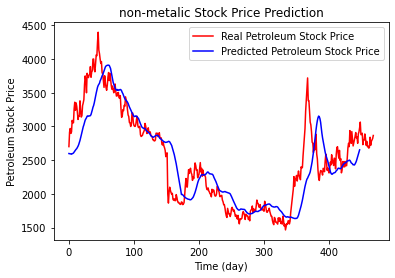

In [31]:
#third code
y_test=[]
real_stock_price = Mineral_test.iloc[:, 1:2].values
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc1.fit_transform(real_stock_price)

# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((Mineral_train['close'],Mineral_test['close']), axis = 0)
# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(Mineral_test) - 21:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

for i in range(21, 469 ):
    X_test.append(inputs[i-21:i, 0])
    y_test.append(inputs[i, 0])

X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = model.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Petroleum Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Petroleum Stock Price')
plt.title('non-metalic Stock Price Prediction')
plt.xlabel('Time (day)')
plt.ylabel('Petroleum Stock Price')
plt.legend()
plt.show()

In [ ]:
Ind2['low'].plot(kind='hist');
plt.ylabel('Number')
plt.xlabel('columns')
plt.title('Non-metallic minerals group')